In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.keras
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
import seaborn as sns
from keras.layers import Input,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import layers
print(tf.__version__)

2.1.0


Using TensorFlow backend.


In [2]:
data = pd.read_csv('XAU_USD Historical Data.csv')
data.head()

,Date,Price,Open,High,Low,Change %
0,20-Nov-20,"1,870.49","1,867.59","1,879.98","1,860.66",0.17%
1,19-Nov-20,"1,867.37","1,871.44","1,874.34","1,852.48",-0.22%
2,18-Nov-20,"1,871.41","1,878.60","1,884.92","1,863.94",-0.38%
3,17-Nov-20,"1,878.60","1,889.15","1,893.90","1,877.69",-0.52%
4,16-Nov-20,"1,888.52","1,888.74","1,899.35","1,864.74",0.03%


In [3]:
data.dropna()

,Date,Price,Open,High,Low,Change %
0,20-Nov-20,"1,870.49","1,867.59","1,879.98","1,860.66",0.17%
1,19-Nov-20,"1,867.37","1,871.44","1,874.34","1,852.48",-0.22%
2,18-Nov-20,"1,871.41","1,878.60","1,884.92","1,863.94",-0.38%
3,17-Nov-20,"1,878.60","1,889.15","1,893.90","1,877.69",-0.52%
4,16-Nov-20,"1,888.52","1,888.74","1,899.35","1,864.74",0.03%
...,...,...,...,...,...,...
2831,7-Jan-10,"1,132.30","1,138.20","1,139.15","1,128.60",-0.58%
2832,6-Jan-10,"1,138.90","1,118.40","1,140.60","1,116.00",1.77%
2833,5-Jan-10,"1,119.05","1,121.30","1,128.10","1,115.25",-0.12%
2834,4-Jan-10,"1,120.40","1,096.25","1,123.80","1,093.45",2.10%


In [4]:
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Date,Price,Open,High,Low,Change %
0,2020-11-20,"1,870.49","1,867.59","1,879.98","1,860.66",0.17%
1,2020-11-19,"1,867.37","1,871.44","1,874.34","1,852.48",-0.22%
2,2020-11-18,"1,871.41","1,878.60","1,884.92","1,863.94",-0.38%
3,2020-11-17,"1,878.60","1,889.15","1,893.90","1,877.69",-0.52%
4,2020-11-16,"1,888.52","1,888.74","1,899.35","1,864.74",0.03%


In [5]:
data = data[::-1]
data

,Date,Price,Open,High,Low,Change %
2835,2010-01-01,"1,097.35","1,097.25","1,097.90","1,097.05",0.10%
2834,2010-01-04,"1,120.40","1,096.25","1,123.80","1,093.45",2.10%
2833,2010-01-05,"1,119.05","1,121.30","1,128.10","1,115.25",-0.12%
2832,2010-01-06,"1,138.90","1,118.40","1,140.60","1,116.00",1.77%
2831,2010-01-07,"1,132.30","1,138.20","1,139.15","1,128.60",-0.58%
...,...,...,...,...,...,...
4,2020-11-16,"1,888.52","1,888.74","1,899.35","1,864.74",0.03%
3,2020-11-17,"1,878.60","1,889.15","1,893.90","1,877.69",-0.52%
2,2020-11-18,"1,871.41","1,878.60","1,884.92","1,863.94",-0.38%
1,2020-11-19,"1,867.37","1,871.44","1,874.34","1,852.48",-0.22%


In [6]:
data = data.reset_index(drop=True)
data

,Date,Price,Open,High,Low,Change %
0,2010-01-01,"1,097.35","1,097.25","1,097.90","1,097.05",0.10%
1,2010-01-04,"1,120.40","1,096.25","1,123.80","1,093.45",2.10%
2,2010-01-05,"1,119.05","1,121.30","1,128.10","1,115.25",-0.12%
3,2010-01-06,"1,138.90","1,118.40","1,140.60","1,116.00",1.77%
4,2010-01-07,"1,132.30","1,138.20","1,139.15","1,128.60",-0.58%
...,...,...,...,...,...,...
2831,2020-11-16,"1,888.52","1,888.74","1,899.35","1,864.74",0.03%
2832,2020-11-17,"1,878.60","1,889.15","1,893.90","1,877.69",-0.52%
2833,2020-11-18,"1,871.41","1,878.60","1,884.92","1,863.94",-0.38%
2834,2020-11-19,"1,867.37","1,871.44","1,874.34","1,852.48",-0.22%


In [7]:
data = data.drop(['Date', 'Open', 'Change %'], axis=1)
data

,Price,High,Low
0,"1,097.35","1,097.90","1,097.05"
1,"1,120.40","1,123.80","1,093.45"
2,"1,119.05","1,128.10","1,115.25"
3,"1,138.90","1,140.60","1,116.00"
4,"1,132.30","1,139.15","1,128.60"
...,...,...,...
2831,"1,888.52","1,899.35","1,864.74"
2832,"1,878.60","1,893.90","1,877.69"
2833,"1,871.41","1,884.92","1,863.94"
2834,"1,867.37","1,874.34","1,852.48"


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2836 entries, 0 to 2835
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   2836 non-null   object
 1   High    2836 non-null   object
 2   Low     2836 non-null   object
dtypes: object(3)
memory usage: 66.6+ KB


In [9]:
data["Price"] = data["Price"].str.replace(",","").astype(float)
data["High"] = data["High"].str.replace(",","").astype(float)
data["Low"] = data["Low"].str.replace(",","").astype(float)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2836 entries, 0 to 2835
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   2836 non-null   float64
 1   High    2836 non-null   float64
 2   Low     2836 non-null   float64
dtypes: float64(3)
memory usage: 66.6 KB


In [11]:
data.tail()

,Price,High,Low
2831,1888.52,1899.35,1864.74
2832,1878.60,1893.90,1877.69
2833,1871.41,1884.92,1863.94
2834,1867.37,1874.34,1852.48
2835,1870.49,1879.98,1860.66


In [12]:
test = data.tail(100)
#test

In [13]:
High = test.High.values
Low = test.Low.values
Price = test.Price.values

In [14]:
X = []
y = []

for i in range(len(High)):
    row = []
    yrow = []
    row.append(High[i])
    row.append(Low[i])
#     row.append(Volume[i])
    yrow.append(Price[i])
    X.append(row)
    y.append(yrow)
X = np.array(X)
y = np.array(y)
#X

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

In [16]:
normalizer = preprocessing.Normalization()
normalizer.adapt(X_train)

In [17]:
horsepower = np.array(X_train)
horsepower2 = np.array(X_train)
horsepower_normalizer = preprocessing.Normalization(input_shape=[1,])
horsepower_normalizer.adapt(horsepower)
horsepower_normalizer2 = preprocessing.Normalization(input_shape=[1,])
horsepower_normalizer2.adapt(horsepower2)

In [18]:
horsepower_model = tf.keras.Sequential([
#horsepower_normalizer,
    layers.Dense(50, activation='relu', input_dim=2),
    layers.Dense(50, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(25, activation='relu'),
    layers.Dense(units=1)
])

In [19]:
horsepower_model.predict(X_test[:10])

array([[27.002897],
       [28.073725],
       [27.833828],
       [27.929026],
       [27.828962],
       [27.922249],
       [29.201136],
       [27.442196],
       [26.201378],
       [25.690205]], dtype=float32)

In [20]:
horsepower_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.0001),
    loss='mean_absolute_error', metrics=['accuracy'])

In [21]:
%%time
history = horsepower_model.fit(
    X_train, y_train,
    epochs=300,
    # suppress logging
    verbose=2,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

Train on 64 samples, validate on 16 samples
Epoch 1/300
64/64 - 0s - loss: 1879.2179 - accuracy: 0.0000e+00 - val_loss: 1877.7708 - val_accuracy: 0.0000e+00
Epoch 2/300
64/64 - 0s - loss: 1873.1108 - accuracy: 0.0000e+00 - val_loss: 1871.6715 - val_accuracy: 0.0000e+00
Epoch 3/300
64/64 - 0s - loss: 1867.0115 - accuracy: 0.0000e+00 - val_loss: 1865.5284 - val_accuracy: 0.0000e+00
Epoch 4/300
64/64 - 0s - loss: 1860.8556 - accuracy: 0.0000e+00 - val_loss: 1859.3381 - val_accuracy: 0.0000e+00
Epoch 5/300
64/64 - 0s - loss: 1854.6431 - accuracy: 0.0000e+00 - val_loss: 1853.1206 - val_accuracy: 0.0000e+00
Epoch 6/300
64/64 - 0s - loss: 1848.4250 - accuracy: 0.0000e+00 - val_loss: 1846.8650 - val_accuracy: 0.0000e+00
Epoch 7/300
64/64 - 0s - loss: 1842.1508 - accuracy: 0.0000e+00 - val_loss: 1840.5437 - val_accuracy: 0.0000e+00
Epoch 8/300
64/64 - 0s - loss: 1835.8162 - accuracy: 0.0000e+00 - val_loss: 1834.1396 - val_accuracy: 0.0000e+00
Epoch 9/300
64/64 - 0s - loss: 1829.3781 - accuracy:

Epoch 73/300
64/64 - 0s - loss: 905.7944 - accuracy: 0.0000e+00 - val_loss: 887.2677 - val_accuracy: 0.0000e+00
Epoch 74/300
64/64 - 0s - loss: 876.6779 - accuracy: 0.0000e+00 - val_loss: 857.4946 - val_accuracy: 0.0000e+00
Epoch 75/300
64/64 - 0s - loss: 846.7292 - accuracy: 0.0000e+00 - val_loss: 827.2650 - val_accuracy: 0.0000e+00
Epoch 76/300
64/64 - 0s - loss: 815.9424 - accuracy: 0.0000e+00 - val_loss: 794.3596 - val_accuracy: 0.0000e+00
Epoch 77/300
64/64 - 0s - loss: 782.2093 - accuracy: 0.0000e+00 - val_loss: 758.6182 - val_accuracy: 0.0000e+00
Epoch 78/300
64/64 - 0s - loss: 745.9532 - accuracy: 0.0000e+00 - val_loss: 720.8318 - val_accuracy: 0.0000e+00
Epoch 79/300
64/64 - 0s - loss: 707.7132 - accuracy: 0.0000e+00 - val_loss: 681.3964 - val_accuracy: 0.0000e+00
Epoch 80/300
64/64 - 0s - loss: 667.8786 - accuracy: 0.0000e+00 - val_loss: 640.4724 - val_accuracy: 0.0000e+00
Epoch 81/300
64/64 - 0s - loss: 626.7809 - accuracy: 0.0000e+00 - val_loss: 598.7528 - val_accuracy: 0.0

Epoch 148/300
64/64 - 0s - loss: 8.8698 - accuracy: 0.0000e+00 - val_loss: 8.0802 - val_accuracy: 0.0000e+00
Epoch 149/300
64/64 - 0s - loss: 8.9092 - accuracy: 0.0000e+00 - val_loss: 8.0837 - val_accuracy: 0.0000e+00
Epoch 150/300
64/64 - 0s - loss: 8.8537 - accuracy: 0.0000e+00 - val_loss: 8.0666 - val_accuracy: 0.0000e+00
Epoch 151/300
64/64 - 0s - loss: 8.8704 - accuracy: 0.0000e+00 - val_loss: 8.0667 - val_accuracy: 0.0000e+00
Epoch 152/300
64/64 - 0s - loss: 8.8647 - accuracy: 0.0000e+00 - val_loss: 8.0692 - val_accuracy: 0.0000e+00
Epoch 153/300
64/64 - 0s - loss: 8.8732 - accuracy: 0.0000e+00 - val_loss: 8.0666 - val_accuracy: 0.0000e+00
Epoch 154/300
64/64 - 0s - loss: 8.8587 - accuracy: 0.0000e+00 - val_loss: 8.0777 - val_accuracy: 0.0000e+00
Epoch 155/300
64/64 - 0s - loss: 8.8922 - accuracy: 0.0000e+00 - val_loss: 8.0667 - val_accuracy: 0.0000e+00
Epoch 156/300
64/64 - 0s - loss: 8.8576 - accuracy: 0.0000e+00 - val_loss: 8.0880 - val_accuracy: 0.0000e+00
Epoch 157/300
64/64

Epoch 224/300
64/64 - 0s - loss: 8.8725 - accuracy: 0.0000e+00 - val_loss: 8.0672 - val_accuracy: 0.0000e+00
Epoch 225/300
64/64 - 0s - loss: 8.9120 - accuracy: 0.0000e+00 - val_loss: 8.0672 - val_accuracy: 0.0000e+00
Epoch 226/300
64/64 - 0s - loss: 8.8554 - accuracy: 0.0000e+00 - val_loss: 8.0843 - val_accuracy: 0.0000e+00
Epoch 227/300
64/64 - 0s - loss: 8.8640 - accuracy: 0.0000e+00 - val_loss: 8.0672 - val_accuracy: 0.0000e+00
Epoch 228/300
64/64 - 0s - loss: 8.8560 - accuracy: 0.0000e+00 - val_loss: 8.0837 - val_accuracy: 0.0000e+00
Epoch 229/300
64/64 - 0s - loss: 8.8650 - accuracy: 0.0000e+00 - val_loss: 8.0876 - val_accuracy: 0.0000e+00
Epoch 230/300
64/64 - 0s - loss: 8.8544 - accuracy: 0.0000e+00 - val_loss: 8.0672 - val_accuracy: 0.0000e+00
Epoch 231/300
64/64 - 0s - loss: 8.8582 - accuracy: 0.0000e+00 - val_loss: 8.0732 - val_accuracy: 0.0000e+00
Epoch 232/300
64/64 - 0s - loss: 8.8587 - accuracy: 0.0000e+00 - val_loss: 8.0749 - val_accuracy: 0.0000e+00
Epoch 233/300
64/64

Epoch 300/300
64/64 - 0s - loss: 8.9322 - accuracy: 0.0000e+00 - val_loss: 8.1908 - val_accuracy: 0.0000e+00
Wall time: 5.14 s


In [22]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail(10)

,loss,accuracy,val_loss,val_accuracy,epoch
290,8.886539,0.0,8.120773,0.0,290
291,8.926157,0.0,8.067818,0.0,291
292,9.138975,0.0,8.067871,0.0,292
293,9.233147,0.0,8.434975,0.0,293
294,9.073214,0.0,8.183044,0.0,294
295,8.856314,0.0,8.067848,0.0,295
296,8.941650,0.0,8.067917,0.0,296
297,8.931116,0.0,8.083397,0.0,297
298,8.841791,0.0,8.192924,0.0,298
299,8.932196,0.0,8.190811,0.0,299


In [23]:
predict = horsepower_model.predict(X)
#predict

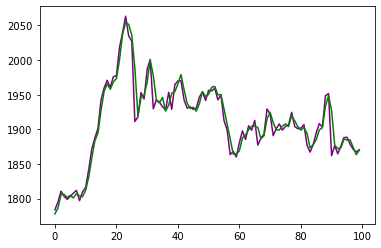

In [24]:
test_plt = test['Price'].reset_index().drop(columns='index')
plt.plot(test_plt, c='purple')
plt.plot(predict, c='g')
